## Project Report (Including PCA Results and Analysis)

# Overview of Steps

1. Data Preprocessing: Standardized the selected dataset to make it suitable for PCA and t-SNE analysis.

2. PCA Analysis: Applied PCA to reduce dimensions to two principal components and visualized the results.

3. t-SNE Analysis: Implemented t-SNE to further explore the non-linear structures of the data, adjusted perplexity parameters for optimization, and visualized the results.



In [19]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load your data
df = pd.read_csv('/Users/kenny/Desktop/dsan-5000-project-kennyzhao0428/data/01-modified-data/clean26.csv')

df_numeric = df.select_dtypes(include=[np.number])

# standardaize
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

print(df_scaled)

[[ 0.21667245  0.19624834  0.23429134  0.23573263 -0.21878339  0.09154825
   0.34296121 -0.21044587 -0.0044963  -0.30453688  0.64593885]
 [-0.79253453 -1.42051852 -0.62838833 -1.73987436  0.84081461  0.6866119
  -2.2222007  -1.57834402  0.98918623  0.84484426  1.15179457]
 [ 0.98487478  1.0565463   1.62514222  1.38687372 -0.80435071  1.45169373
   0.89263876 -0.27124134 -0.47211161 -1.83704507 -1.78216862]
 [-0.09964615  1.14554264  0.32231987  1.16909027 -1.08319229  1.19666646
   2.17521971 -0.45362776 -0.29675587 -1.1985     -0.26460146]
 [ 1.10537711  1.01204813  0.70964544  0.3290684  -0.66492992  0.43158462
   0.46511177  0.39750886 -0.64746735 -0.94308196 -1.2763129 ]
 [-0.28039964 -0.60471873 -0.29387989 -0.80651672 -0.33032003 -0.4185063
   0.15973536  1.61341833 -0.29675587  1.22797131  0.29183984]
 [ 0.27692361  0.44840464  0.53358836  0.34462436  0.17159482 -0.4185063
   0.34296121 -0.18004813 -0.17985204  0.3340082   0.24125427]
 [-0.23521127 -1.15352949 -1.40303945 -1.210

# PCA Results and Analysis

# PCA Results: 

The first principal component (PC1) explained about 56.02% of the variance in the data.
The second principal component (PC2) explained about 17.59% of the variance.
Principal Component Loadings: These loadings indicate the contribution of each original feature to the principal components. In this case, all features contributed to both principal components, albeit differently.

Visualization: The PCA scatter plot showed the distribution of data points in the new space formed by the two principal components.


[0.56022745 0.17590308]


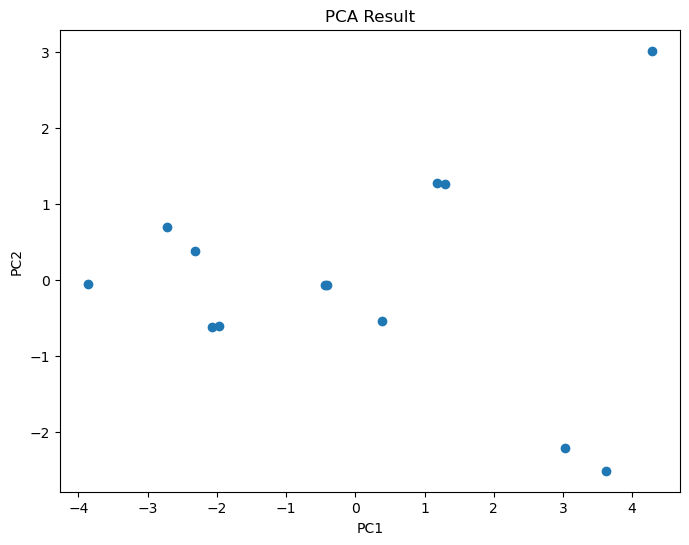

PCA Components (Direction of the Principal Components):
[[-0.32381985 -0.38160383 -0.37958675 -0.38537386  0.37014801 -0.24662653
  -0.25656298  0.08016904  0.19020272  0.27616886  0.27274157]
 [-0.31189866 -0.02686737 -0.14419338  0.02077494 -0.01035683 -0.09759981
   0.36946729  0.64503021 -0.54818638 -0.13271508  0.0211992 ]]

Explained Variance Ratio (Per Principal Component):
[0.56022745 0.17590308]


In [17]:

pca = PCA(n_components=2)  # number of pc
pca_result = pca.fit_transform(df_scaled)

# 
print(pca.explained_variance_ratio_)

# visul
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Result')
plt.show()

# plot
print("PCA Components (Direction of the Principal Components):")
print(pca.components_)

# each
print("\nExplained Variance Ratio (Per Principal Component):")
print(pca.explained_variance_ratio_)



# PCA result

Here, you calculate two principal components, and the proportions of explained variance for these two components are:

The first principal component (PC1) explains approximately 56.02% of the variance.
The second principal component (PC2) explains approximately 17.59% of the variance.

Therefore, among the two principal components, the first principal component (PC1) is the most dominant component because it explains the largest proportion of the variance. Following closely is the second principal component (PC2).

In PCA, "main" usually refers to the component that contributes most to the variability (i.e., variance) of the data set. In most cases, we focus on those first few principal components that explain most of the variability in the data set. In your case, only two principal components are calculated, so both are considered principal, but the first one is more important because it explains more variance.

# t-SNE Results

t-SNE Results: t-SNE displayed the distribution of the data in a reduced two-dimensional space, highlighting potential patterns and clusters in the data.


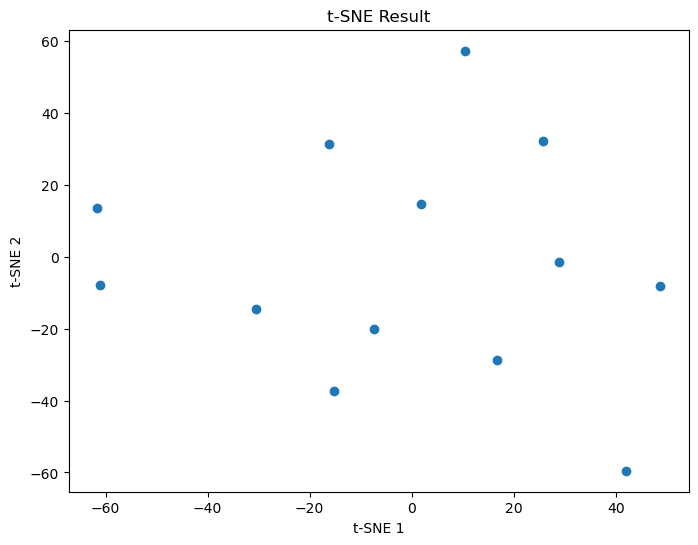

t-SNE Low Dimensional Coordinates:
[[  1.7516272  14.599764 ]
 [ 28.91664    -1.3949598]
 [-61.713047   13.489791 ]
 [ 10.525141   57.282585 ]
 [-61.189743   -7.872035 ]
 [ -7.4378967 -20.117245 ]
 [ 16.797043  -28.856447 ]
 [ 48.76994    -8.20627  ]
 [ 42.00432   -59.512516 ]
 [ 25.705366   32.046497 ]
 [-15.215026  -37.46654  ]
 [-30.574137  -14.487133 ]
 [-16.266922   31.286976 ]]


In [18]:

tsne = TSNE(n_components=2, perplexity=5, n_iter=300)
tsne_result = tsne.fit_transform(df_scaled)

# tsne visual
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE Result')
plt.show()

print("t-SNE Low Dimensional Coordinates:")
print(tsne.embedding_)


# Combined Analysis and Insights

PCA Analysis: PCA revealed the most significant variability in the data. As a linear technique, it might not capture all complex, non-linear patterns.

t-SNE Analysis: t-SNE provided a more detailed view of local structures and potential clusters, especially in terms of non-linear relationships in the data.

# Comparison

PCA vs t-SNE:

PCA provides a global view of the data in an intuitive way, helping to quickly grasp overall trends.

t-SNE more powerfully reveals local structures and non-linear relationships, suitable for discovering potential data clusters.

# Conclusion: 
Combining PCA and t-SNE analyses allows us to understand the data from different perspectives, thus gaining more comprehensive insights. PCA is suitable for a quick overview of global trends, while t-SNE is applicable for exploring complex local patterns and clusters.

# Future Directions

These insights can guide more in-depth data analysis, such as clustering, anomaly detection, or predictive model building. Understanding these fundamental structures of the data is a crucial prerequisite for more complex analyses.